#### Muhammad Kevin Alrahmanto (19/445592/PA/19416) ft. $Openai.com$

In [1]:
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Simulated Data

In [26]:
# Generate simulated data
np.random.seed(42)
num_points=210
X = np.sort(5 * np.random.rand(num_points, 1), axis=0)
y = np.sin(X).ravel()
pd.DataFrame(np.transpose(np.vstack([X.ravel(), y])), columns=['x', 'y'])

,x,y
0,0.025308,0.025305
1,0.027611,0.027607
2,0.034761,0.034754
3,0.045985,0.045969
4,0.082939,0.082844
...,...,...
205,4.847923,-0.990829
206,4.849549,-0.990608
207,4.858910,-0.989285
208,4.928252,-0.976792


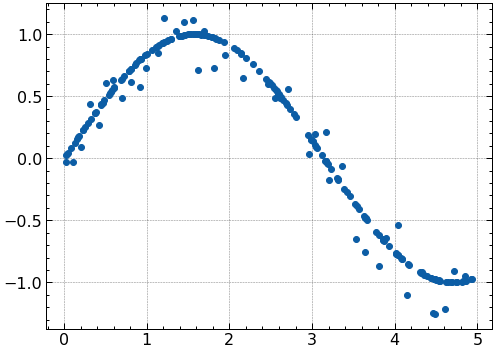

In [27]:
# Add noise to the target
y[::5] += 0.5 * (0.5 - 1.1*np.random.rand(int(num_points/5)))
plt.scatter(X, y);

In [28]:
#Shuffling the data
idx_X=np.arange(len(X))
np.random.shuffle(idx_X)
idx_X

array([135,  80, 177,  86, 125, 140,  37,  67, 101,  13,  41, 121, 155,
        55,  74, 172,  27, 165, 144, 205, 170,  10,  45, 206,  20, 194,
         6, 128,  72,  40,  29,  83,  81, 148,  44, 146,  94, 189,  78,
        58, 162,  30, 145, 132, 120,  43, 130,  73,  39,  90,  70,   2,
       106,  36, 185, 163,  71,  79,  34, 179, 138,  96, 171,  26, 161,
         1, 199,  82,   3,  76, 190, 131, 192, 168, 133, 111,  84,   9,
       117,  32, 183, 139, 137, 109,  87, 118, 186,  99,  77,  28, 200,
       158, 159, 104, 181,  75, 202,  92,  21,  68, 207,  63, 167,  60,
        15, 112, 188,  88,  47,  95,  33, 110, 166, 156,   0,  11,   8,
        22,  61, 116, 122, 147,  89, 196, 153, 164,  18, 157, 119, 105,
       123, 198, 176,  51,  54, 180,  46,  93, 115, 108,   5, 102,   4,
       107, 184,  52, 182, 100, 204,  14,  69,  48, 187, 191, 203, 149,
       124,  62, 178,  50, 195, 197,  65,  97,  91, 142, 114, 141, 143,
         7,  64,  19,  35,  56, 134,  59,  12, 151, 152,  49,  9

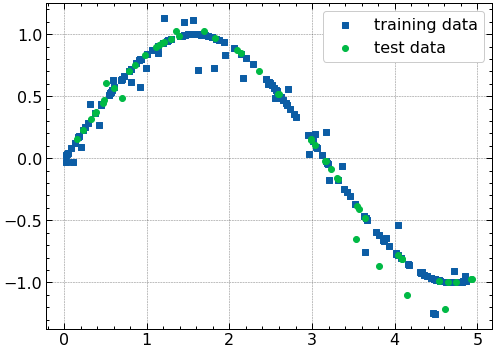

In [29]:
# Split the data into training and test sets
X=X[idx_X]
y=y[idx_X]

X_train, X_test = X[:160], X[160:]
y_train, y_test = y[:160], y[160:]
plt.scatter(X_train,y_train, marker='s', label='training data')
plt.scatter(X_test,y_test, marker='o', label='test data')
plt.legend();

Regression Kernel Methods are a family of machine learning algorithms that **use kernel functions to model non-linear relationships in data for regression tasks**. The idea behind these methods is to transform the input features into a high-dimensional space, where a linear regression model can be applied, using a kernel function.

There are several regression kernel methods, including:

1. **Support Vector Regression (SVR):** SVR is a type of support vector machine that is used for regression tasks. It maps the input data into a high-dimensional feature space using a kernel function and then finds the hyperplane that best separates the data into classes.

2. **Gaussian Process Regression (GPR):** GPR is a non-parametric Bayesian approach to regression that models the data using a Gaussian distribution. It uses a kernel function to model the covariance between the input features and target variable.

3. **Kernel Ridge Regression (KRR):** KRR combines Ridge Regression with the kernel trick to model non-linear relationships in data. It maps the input data into a high-dimensional space using a kernel function and performs linear regression in that space.

4. **Locally Weighted Regression (LWR):** LWR is a non-parametric regression algorithm that assigns higher weights to points that are closer to a query point. It uses a kernel function to model the similarity between points in the data.

In general, regression kernel methods are useful when the relationships between the input variables and the target variable are complex and non-linear, and when there is **a small amount of training data**. The choice of kernel function can have a significant impact on the performance of the algorithm, so it is important to carefully consider the properties of the data when selecting a kernel function.

**A kernel algorithm** is a type of machine learning algorithm that helps to transform data into a higher dimensional space in order to find a boundary between different classes of data points. This boundary can then be used to make predictions about new data points based on their position relative to the boundary.

Think of it like trying to draw a line between two different colors of M&Ms on a flat surface. If you only have two colors, a simple line will do the job. But if you have more colors, you might need to transform the data into a higher dimensional space to properly separate the colors.

Kernels are mathematical functions that are used to perform this transformation. They are like "handles" that allow the algorithm to manipulate and analyze the data in a more useful way. The choice of kernel can have a big impact on the performance of the algorithm, so it is an important consideration in the design of any machine learning model.

# 1. KRR 

**Kernel Ridge Regression (KRR) is a machine learning algorithm that combines Ridge Regression (a regularization technique) with the kernel trick.** The kernel trick allows the algorithm to model non-linear relationships in the data by transforming the input features into a higher-dimensional space, where a linear regression model can be applied.

KRR uses a kernel function to map the input data into a higher-dimensional feature space and then performs linear regression in that space. The kernel function can be chosen based on the properties of the data, such as polynomial, radial basis function (RBF), or sigmoid.

In KRR, the model parameters are found by minimizing the mean squared error (MSE) between the predicted and actual values, with an L2 regularization term to prevent overfitting. The regularization parameter, lambda, controls the trade-off between the MSE and the magnitude of the coefficients in the model.

KRR can be used for a variety of tasks, including regression, classification, and dimensionality reduction. It is especially useful in cases where the relationships between the input variables and the target variable are complex and non-linear, and when there is a small amount of training data.

**check also: https://www.mdelcueto.com/blog/kernel-ridge-regression-tutorial/**

In [6]:
from sklearn.kernel_ridge import KernelRidge

# Train a KRR model on the training data
krr = KernelRidge(kernel='rbf',  gamma=0.1, alpha=0.000001)
krr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = krr.predict(X_test)

# Evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 0.006084487046292849
R-squared: 0.987826619405667


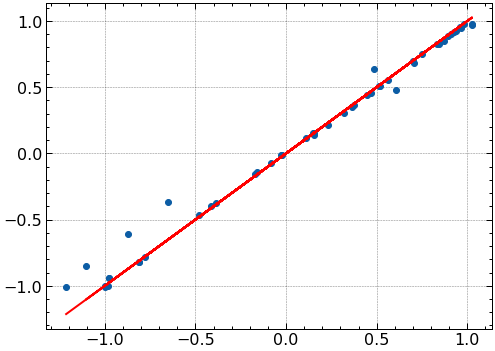

In [7]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red');

Kernel Ridge Regression (KRR) is a regularized version of Ridge Regression that uses the kernel trick to project the data into a high-dimensional feature space. The main parameters of KRR are:

**alpha:** This is the regularization strength, similar to Ridge Regression. A higher value of alpha increases the regularization effect, leading to a simpler model.

**kernel:** This is the kernel function used to project the data into a higher-dimensional feature space. The most common kernel functions used in KRR are the polynomial, radial basis function (RBF), and sigmoid kernels.

**degree:** This is the degree of the polynomial kernel.

**gamma:** This is the kernel coefficient for the RBF and sigmoid kernels. A higher value of gamma increases the influence of individual samples.

**coef0:** This is the constant term in the polynomial and sigmoid kernels.

# 2. SVR

**SVR works by finding the best line (or hyperplane) that separates the data points into two groups.** This line is chosen in a way that maximizes the margin between the two groups, or in other words, the distance between the line and the closest data points. These closest data points are called "support vectors."

Once the line is found, it can be used to make predictions about new data points by seeing which side of the line they fall on. The prediction is based on the average value of the data points in that group.

In simpler terms, SVR is like a tool that helps to predict a value based on other values. It does this by finding the best line to separate the data and using it to make predictions. SVR can be useful in a variety of applications, such as predicting stock prices, forecasting weather, and more.

**Kernel:** The kernel function used to transform the input data into a higher dimensional space to find the optimal boundary. The most commonly used kernels are linear, polynomial, radial basis function (RBF), and sigmoid.

**C:** It is the regularization parameter that controls the trade-off between getting a good fit to the training data and having a simple model. Larger values of C result in a more complex model.

**Gamma:** It is the kernel coefficient for the RBF, polynomial, or sigmoid kernel. It determines the shape of the boundary.

**Epsilon:** It is the parameter used to determine the width of the margin between the support vectors and the decision boundary.

**Tolerance:**It determines the accuracy of the solution. A smaller value of tolerance will result in a more accurate solution but takes longer to run.

In [8]:
from sklearn.svm import SVR

# Train a SVR model on the training data
svr = SVR(kernel='poly', C=1e3, degree=2)
svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr.predict(X_test)

# Evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Squared Error: 0.10213761630480443
R-squared: 0.7956507973775871


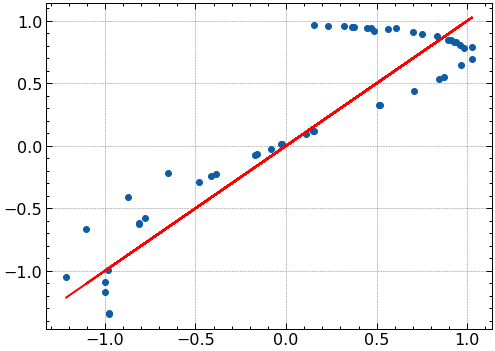

In [9]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test,color='red' );

# 3. GPR

**Mean function**: A mathematical expression that represents the prior mean of the target function.

**Covariance function (Kernel):** It defines the correlation between the input variables and determines the smoothness of the target function.

**Noise level:** It represents the level of uncertainty in the target function and the measurement error.

**Hyperparameters:** The parameters of the covariance function and the mean function that control their behavior. These parameters need to be estimated or optimized during the model training process.

Gaussian Process Regression (GPR) is a type of machine learning algorithm used for regression problems. Regression problems involve predicting a continuous value, like the price of a stock or the temperature outside.

GPR works by modeling the relationship between the input variables and the target variable as a random process. This means that **the algorithm assigns a probability distribution to the possible values of the target variable, given a set of input variables.**

The algorithm uses this probability distribution to make predictions about the target variable for new data points. The predictions take into account the uncertainty in the model and provide a range of possible values, instead of just a single value.

In simpler terms, GPR is like a tool that helps to predict a value based on other values. It does this by modeling the relationship between the input variables and the target variable as a random process and using that information to make predictions.

In [10]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Define the kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

# Train a GPR model on the training data
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr.fit(X_train, y_train)

# Make predictions on the test data
y_pred, sigma = gpr.predict(X_test, return_std=True)

# Evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 0.2553708610822333
R-squared: 0.48907333337973513


C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


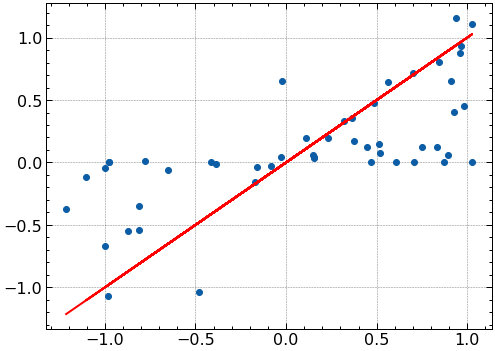

In [11]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test,color='red' );

# 4. KNN Regression (review) and LWR

### 4.1  KNN Regression (review)

KNN Regressor is a machine learning algorithm that is used to predict a target value based on the nearest data points in the training set.

Imagine you have a dataset of heights and weights of people, and you want to predict the weight of a new person based on their height. The KNN Regressor will look at the K nearest people in the dataset (based on their height), and predict the weight of the new person as the average of the weights of the K nearest neighbors.

So, the idea behind KNN Regressor is to find the closest data points and use those data points to make a prediction for a new data point. The "K" in KNN Regressor refers to the number of nearest neighbors that the algorithm considers when making a prediction.

In [12]:
from sklearn.neighbors import KNeighborsRegressor
# Train a LWR model on the training data
lwr = KNeighborsRegressor(weights='distance')
lwr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lwr.predict(X_test)

# Evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 0.008275575297769297
R-squared: 0.9834428560747472


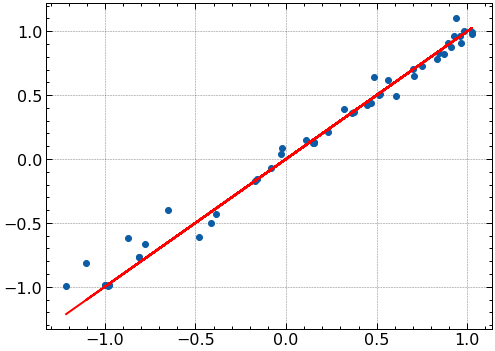

In [13]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test,color='red' );

### 4.2 LWR from scratch

#### scikit-learn (sklearn) does not have a built-in implementation of Locally Weighted Regression (LWR) However, you can implement LWR from scratch using numpy and scipy libraries in Python, or you could use other libraries that provide LWR implementation such as statsmodels.

Locally Weighted Regression (LWR) is a type of machine learning algorithm used for regression problems. Regression problems involve predicting a continuous value, like the price of a stock or the temperature outside.

LWR works by fitting a separate regression model to each data point.**The models are weighted based on how close each data point is to the point being predicted.** This means that data points that are close to the point being predicted have a stronger influence on the prediction than data points that are far away.

The algorithm then combines the individual models to make a prediction for the point being considered. This approach allows LWR to capture complex relationships between the input variables and the target variable, while still being flexible enough to handle non-linear relationships.

In simpler terms, LWR is like a tool that helps to predict a value based on other values. It does this by fitting a separate regression model to each data point, weighting the models based on how close each data point is to the point being predicted, and combining the models to make a prediction. LWR can be useful in a variety of applications, such as predicting stock prices, forecasting weather, and more.

1. Prediction method: In KNN Regression, the prediction for a new data point is made by averaging the target values of its k-nearest neighbors. In LWR, the prediction is made by fitting a weighted linear regression model to the data points close to the point being predicted.

2. Complexity: KNN Regression has a linear time complexity with respect to the number of training data points, as it needs to compute the distances between the test point and all the training data points. LWR has a quadratic time complexity, as it requires the inversion of a matrix.

3.  Flexibility: **LWR allows for different weighting functions to be used, which can have a significant impact on the quality of the predictions. In KNN Regression, the weighting is typically done using a simple function such as the inverse of the distance or the Gaussian function.**


### Gaussian Weighting Function

#### 1 Feature

Prediction at x=5: -1.071053228600384


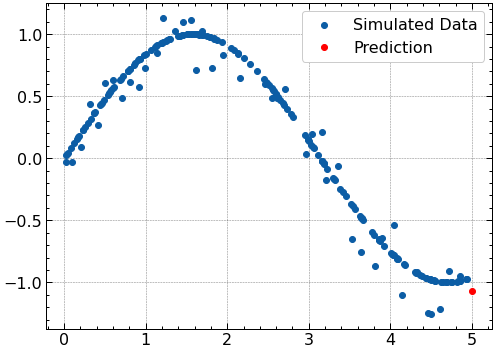

In [14]:
# Define the LWR function
def LWR(x, X, y, tau):
    # Calculate the weight for each data point based on its distance from x
    weights = np.exp(-np.power(X - x, 2) / (2 * np.power(tau, 2)))
    
    # Fit a weighted linear regression model using the weights
    X = np.vstack([X, np.ones(len(X))]).T
    beta = np.linalg.inv(X.T @ (np.diag(weights) @ X)) @ (X.T @ (weights * y))
    
    # Return the prediction
    return beta[0] * x + beta[1]

# Predict the value at x=5 using a tau of 0.5
prediction = LWR(5, X.ravel(), y, 0.5)
print("Prediction at x=5:", prediction)

# Plot the simulated data and the prediction
plt.scatter(X, y, label='Simulated Data')
plt.plot(5, prediction, 'ro', label='Prediction')
plt.legend();

In this example, we first generate some simulated data using np.linspace and np.random.normal. We then define a function LWR that takes as input a value x to be predicted, the training data X and y, and a parameter **tau that controls the width of the Gaussian weighting function.**

The function first calculates the weight for each data point based on its distance from x, using the Gaussian weighting function. It then fits a weighted linear regression model using the weights, and returns the prediction.

Finally, we use the LWR function to make a prediction at x=5 using a tau of 0.5, and plot the simulated data and the prediction.

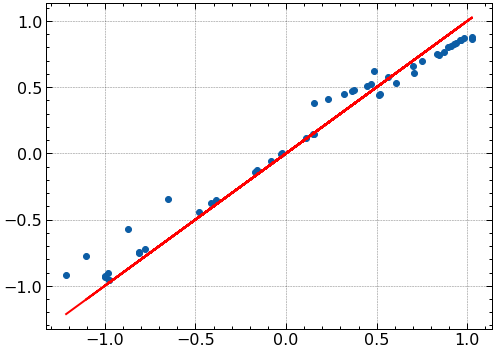

In [32]:
class LocalWeightedRegression:
    def __init__(self, bandwidth):
        self.bandwidth = bandwidth
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        y_pred = []
        for x in X:
            weights = np.exp(-np.sum((self.X_train - x) ** 2, axis=1) / (2 * self.bandwidth ** 2))
            b = np.dot(weights, self.y_train) / np.sum(weights)
            y_pred.append(b)
        return np.array(y_pred)

# Train the model
lwr = LocalWeightedRegression(bandwidth=0.5)
lwr.fit(X_train, y_train)

# Predict the output
y_pred = lwr.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red');

Note that the bandwidth parameter controls the smoothness of the regression. A smaller bandwidth results in a more flexible fit, while a larger bandwidth results in a smoother fit.

#### 2 Features

In [35]:
class LocalWeightedRegression:
    def __init__(self, bandwidth):
        self.bandwidth = bandwidth
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        y_pred = []
        for x in X:
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            weights = np.exp(-distances**2 / (2 * self.bandwidth**2))
            W = np.diag(weights)
            X_w = np.dot(W, self.X_train)
            beta = np.linalg.inv(np.dot(self.X_train.T, X_w)).dot(X_w.T).dot(self.y_train)
            y_pred.append(np.dot(x, beta))
        return np.array(y_pred)

In [42]:
# Generate some simulated data
np.random.seed(0)
X_train = np.random.normal(0, 1, (100, 2))
y_train = np.sin(X_train[:, 0]) + np.random.normal(0, 0.1, 100)
X_test = np.random.normal(0, 1, (50, 2))
y_test = np.sin(X_test[:, 0]) + np.random.normal(0, 0.1, 50)
df_train=pd.DataFrame(X_train, columns=['Feature_1', 'Feature_2'])
df_train

,Feature_1,Feature_2
0,1.764052,0.400157
1,0.978738,2.240893
2,1.867558,-0.977278
3,0.950088,-0.151357
4,-0.103219,0.410599
...,...,...
95,-1.292857,0.267051
96,-0.039283,-1.168093
97,0.523277,-0.171546
98,0.771791,0.823504


In [66]:
df_test=pd.DataFrame(X_test, columns=['Feature_1', 'Feature_2'])
df_test.tail()

,Feature_1,Feature_2
45,0.567290,-0.222675
46,-0.353432,-1.616474
47,-0.291837,-0.761492
48,0.857924,1.141102
49,1.466579,0.852552


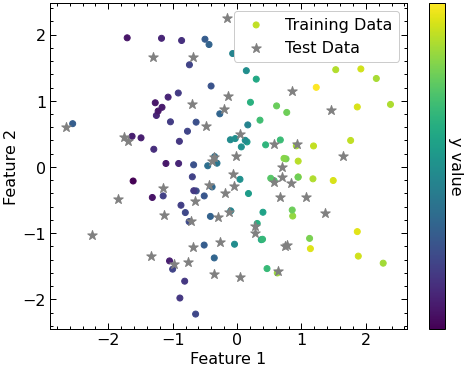

In [75]:
plt.scatter(df_train['Feature_1'],df_train['Feature_2'], c=y_train, label='Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(df_test['Feature_1'],df_test['Feature_2'], color='gray', marker='*', s=100, label='Test Data')
 
cbar = plt.colorbar()
cbar.ax.get_yaxis().set_ticks([])
cbar.ax.get_yaxis().labelpad = 18
cbar.ax.set_ylabel('y value', rotation=270)
plt.legend();

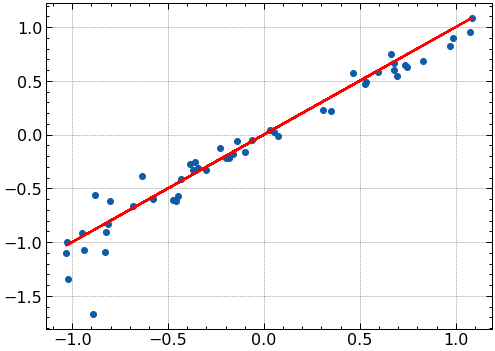

In [76]:
# Train the model
lwr = LocalWeightedRegression(bandwidth=0.5)
lwr.fit(X_train, y_train)

# Predict the output
y_pred = lwr.predict(X_test)
plt.scatter(y_test, y_pred);
plt.plot(y_test, y_test, color='red');


### Triweight Function

Prediction at x = 3 : -0.08948923061640124


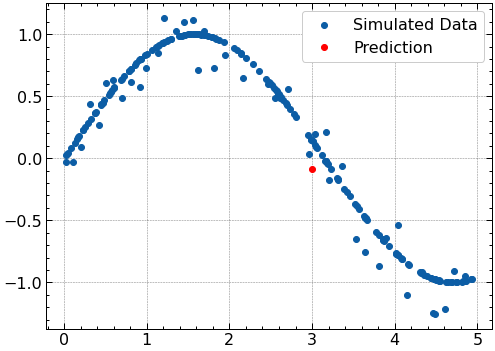

In [77]:
# Define the LWR function
def LWR(x, X, y, tau, weighting_func):
    # Calculate the weight for each data point based on its distance from x
    weights = weighting_func(np.abs(X - x) / tau)
    
    # Fit a weighted linear regression model using the weights
    X = np.vstack([X, np.ones(len(X))]).T
    beta = np.linalg.inv(X.T @ (np.diag(weights) @ X)) @ (X.T @ (weights * y))
    
    # Return the prediction
    return beta[0] * x + beta[1]

# Define a different weighting function
def triweight(d):
    return np.power(1 - np.power(d, 2), 3)

# Predict the value at x=1.88 using a tau of 0.5 and the triweight function
x=3
prediction = LWR(x, X.ravel(), y, 100, triweight)
print(f"Prediction at x = {x} :", prediction)

# Plot the simulated data and the prediction
plt.scatter(X, y, label='Simulated Data')
plt.plot(x, prediction, 'ro', label='Prediction')
plt.legend();

The triweight function is a type of weighting function that is commonly used in locally weighted regression (LWR) algorithms. The triweight function assigns lower weights to data points that are further away from the point being predicted and higher weights to data points that are closer.

**The triweight function is defined as:**
w(d) = (1 - d^2)^3

where d is the distance between the point being predicted and the data point.

The triweight function has a similar shape to the Gaussian weighting function, but has sharper peaks and heavier tails, which makes it more suitable for modeling data with strong local structures.

# 5. Some Important Notes

1. **Parametric Methods:** The basic idea behind the parametric method is that there is a set of fixed parameters that uses to determine a probability model that is used in Machine Learning as well. Parametric methods are those methods for which we priory knows that the population is normal, or if not then we can easily approximate it using a normal distribution which is possible by invoking the Central Limit Theorem. Parameters for using the normal distribution is as follows: 
- Mean
- Standard Deviation

Eventually, the classification of a method to be parametric is completely depends on the presumptions that are made about a population. There are many parametric methods available some of them are:

- Confidence interval used for – population mean along with known standard deviation.
- The confidence interval is used for – population means along with the unknown standard deviation.
- The confidence interval for population variance.
- The confidence interval for the difference of two means, with unknown standard deviation.

2. **Nonparametric Methods:** The basic idea behind the parametric method is no need to make any assumption of parameters for the given population or the population we are studying. In fact, the methods don’t depend on the population. Here there is no fixed set of parameters are available, and also there is no distribution (normal distribution, etc.) of any kind is available for use. This is also the reason that nonparametric methods are also referred to as distribution-free methods. Nowadays Non-parametric methods are gaining popularity and an impact of influence some reasons behind this fame is:

The main reason is that there is no need to be mannered while using parametric methods.
The second important reason is that we do not need to make more and more assumptions about the population given (or taken) on which we are working on.
Most of the nonparametric methods available are very easy to apply and to understand also i.e. the complexity is very low.

https://www.geeksforgeeks.org/difference-between-parametric-and-non-parametric-methods/